{'cluster 1': [[2, 3], [3, 2], [3, 3], [2, 2]], 'cluster 2': [[0, 1], [1, 0], [1, 1], [0, 0]], 'noise': []}


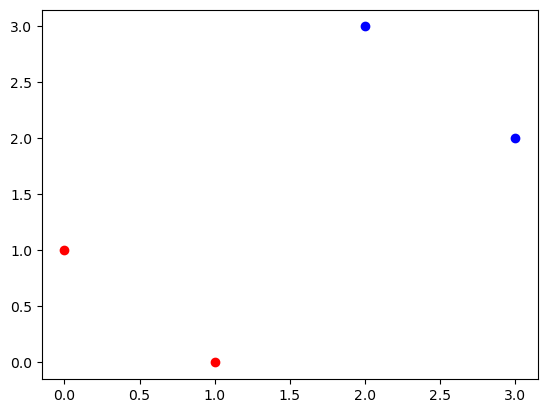

In [59]:
class dbscan:
    eps=None
    minpts=None
    def __init__(self,eps,minpts):
        self.eps=eps
        self.minpts=minpts
    def fit(self,x):   
        def round(points,x):
            '''
            This function outputs all the  data points within the neighborhood round of a single data point,
            and decide wether or not it is dense.
            'points' is a list of  selected data points.
            'x' is a 2-dimension array of features of all the data points.
            
            '''
            import numpy as np
            result=[]
            for point in points:
                distances=np.sqrt(np.sum((x-np.array(point))**2,axis=1))
                if x[distances<=self.eps].shape[0]>=self.minpts:
                    result.append(x[distances<=self.eps].tolist())
            return [item for sublist in result for item in sublist]
        
        def dedouble(lst):
            '''
            This function remove the duplicate 1-dimension lists in a 3-dimension list
        
            '''
            return list({tuple(sublist) for sublist in lst})
        
        def cluster(x):
            '''
            This function outputs all the data points that is the core points or within the neighborhood of core points as a cluster
        
            '''
            import numpy as np
            x_index=np.arange(x.shape[0])
            if x_index.shape[0]==0:
                return []
            selected_intial_point_index=np.random.RandomState(123).choice(x_index)
            selected_intial_point=x[selected_intial_point_index]
            results=[]
            points=round(selected_intial_point,x)
            results.append(points)
            while True:
                points=round(points,x)
                results.append(dedouble(points))
                if results[-2]==results[-1]:
                    break
            return [list(item) for item in dedouble(points)]
            
        def delete_points(x):
            '''
            This function delete the points in a cluster from all data points for the convenience of select an intial point 
            for the next cluster.
        
            '''
            x_list=x.tolist()
            for point in cluster(x):
                x_list.remove(point)
            x=np.array(x_list)
            return x
            
        clusters=[]
        while True:
            if cluster(x)==[]:       
                break
            clusters.append(cluster(x))
            x=delete_points(x)
        noise=x.tolist()
        keys=[]
        for i in range(1,len(clusters)+1):
            keys.append(f'cluster {i}')
        keys.append('noise')
        clusters.append(noise)
        self.clusters_noise=clusters
        final_result=dict(zip(keys,clusters))
        self.final_result=final_result
                
    def predict(self,x):
        return self.final_result

 #test
x=np.array([[1,1],[0,0],[0,1],[1,0],[2,2],[2,3],[3,2],[3,3]])
clf=dbscan(1,3)
clf.fit(x)
print(clf.predict(x))
result=clf.predict(x)
#graph
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ax.scatter(result['cluster 1'][:][0],result['cluster 1'][:][1],color='blue')
ax.scatter(result['cluster 2'][:][0],result['cluster 2'][:][1],color='red')


